<a href="https://colab.research.google.com/github/bitwoman/api_rick_and_morty/blob/main/rickandmortyapi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÃO DE LIBS

In [ ]:
import matplotlib.pyplot as plt
import requests as rq
import pandas as pd
import json

# REQUISIÇÃO À API

In [ ]:
i = 1
lista_personagens = []

while True:
    url = "https://rickandmortyapi.com/api/character/?page={}".format(i)
    requisicao = rq.get(url) # timeout=3

    # enquanto ainda for conexão com sucesso, trazer as páginas
    if requisicao.status_code == 200:
        endereco = requisicao.json()
        personagens = endereco['results'] # colocar o objeto (que compõe um json) results dentro de uma variável

       # extraindo apenas colunas importantes e adicionando a uma lista de personagens
        for personagem in personagens:
            nome = personagem["name"]
            tipo = personagem["type"]
            genero = personagem["gender"]
            especie = personagem['species']
            data_criacao = personagem['created']

            lista_personagens.append(
                {
                    "Nome": nome,
                    "Tipo": tipo,
                    "Gênero": genero,
                    "Espécie": especie,
                    "Data criação": data_criacao
                }
            )
            i = i + 1
    else:
        break

df_personagens = pd.DataFrame(lista_personagens)
print(df_personagens.head(10))

                        Nome                                Tipo  Gênero  \
0               Rick Sanchez                                        Male   
1                Morty Smith                                        Male   
2               Summer Smith                                      Female   
3                 Beth Smith                                      Female   
4                Jerry Smith                                        Male   
5  Abadango Cluster Princess                                      Female   
6           Abradolf Lincler                  Genetic experiment    Male   
7           Adjudicator Rick                                        Male   
8            Agency Director                                        Male   
9                 Alan Rails  Superhuman (Ghost trains summoner)    Male   

  Espécie              Data criação  
0   Human  2017-11-04T18:48:46.250Z  
1   Human  2017-11-04T18:50:21.651Z  
2   Human  2017-11-04T19:09:56.428Z  
3   Human  

# ANÁLISE: DISTRIBUIÇÃO DE GÊNEROS

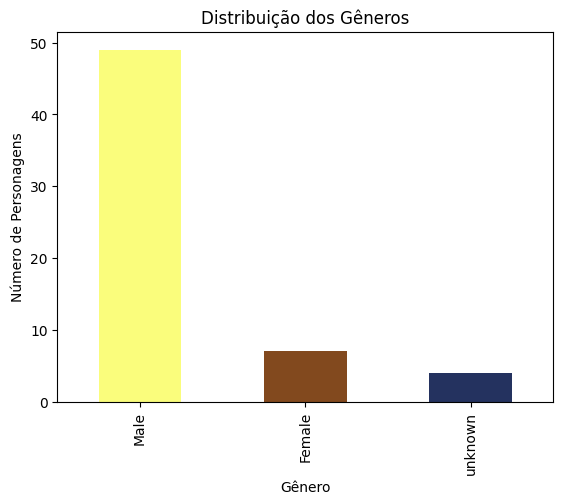

In [ ]:
cores = ['#FAFD7CFF','#82491EFF', '#24325FFF'] # a quantidade de cores tem que ser a mesma quantidade de barras que o gráfico terá
contagem_generos = df_personagens['Gênero'].value_counts()
contagem_generos.plot(kind='bar', color=cores, title='Distribuição dos Gêneros')

# cria o rótulo inferior do gráfico (eixo x - horizontal)
plt.xlabel('Gênero')

# cria um rótulo ao lado do gráfico (eixo y - vertical)
plt.ylabel('Número de Personagens')

# exibe o gráfico
plt.show()

print('\n')

# ANÁLISE: DISTRIBUIÇÃO DE TIPOS

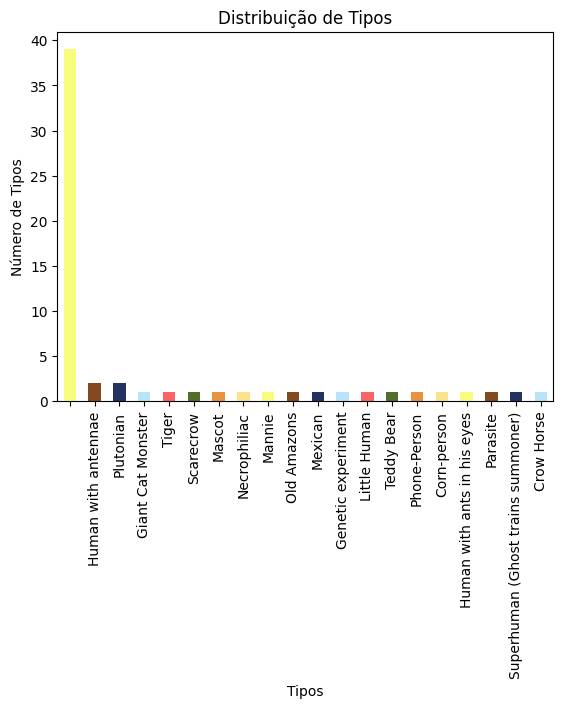

In [ ]:
cores = ['#FAFD7CFF','#82491EFF', '#24325FFF', '#B7E4F9FF', '#FB6467FF', '#526E2DFF', '#E89242FF', '#FAE48BFF']
contagem_tipos.plot(kind='bar', color=cores, title='Distribuição de Tipos')

# cria o rótulo inferior do gráfico (eixo x - horizontal)
plt.xlabel('Tipos')

# cria um rótulo ao lado do gráfico (eixo y - vertical)
plt.ylabel('Número de Tipos')

# exibe o gráfico
plt.show()

# ANÁLISE: DISTRIBUIÇÃO DE ESPÉCIES

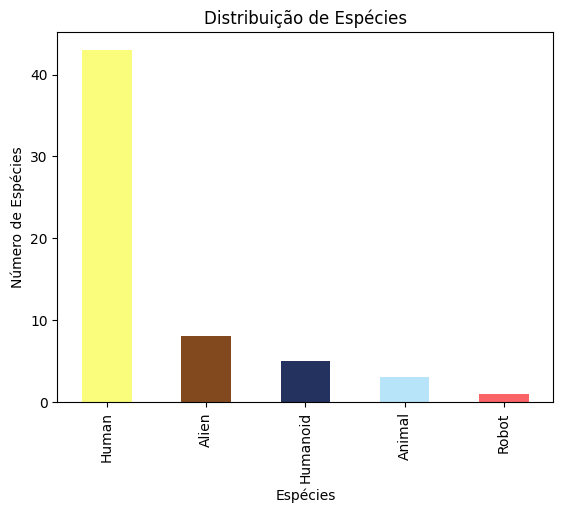

In [ ]:
cores = ['#FAFD7CFF','#82491EFF', '#24325FFF', '#B7E4F9FF', '#FB6467FF', '#526E2DFF', '#E89242FF', '#FAE48BFF']
contagem_especies = df_personagens['Espécie'].value_counts()
contagem_especies.plot(kind='bar', color=cores, title='Distribuição de Espécies')

# cria o rótulo inferior do gráfico (eixo x - horizontal)
plt.xlabel('Espécies')

# cria um rótulo ao lado do gráfico (eixo y - vertical)
plt.ylabel('Número de Espécies')

# exibe o gráfico
plt.show()